In [1]:
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l
from torch import nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#

In [3]:
class MNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.MNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.MNIST(
            root=self.root, train=False, transform=trans, download=True)

In [4]:
#

In [5]:
dataset = MNIST()
print(len(dataset.train), len(dataset.val))
print(dataset.train.data.shape)

60000 10000
torch.Size([60000, 28, 28])


In [6]:
#

In [7]:
@d2l.add_to_class(MNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [8]:
#

In [9]:
X, y = next(iter(dataset.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


In [10]:
#

In [11]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, af='sigmoid'):
        super().__init__()
        self.save_hyperparameters()

        if 
        activation_function =
        
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.Sigmoid(),
            nn.LazyLinear(num_outputs)
        )

In [ ]:
#

In [18]:
def evaluate_accuracy(model, data_iter):
	model.eval()
	metric = d2l.Accumulator(2)
	with torch.no_grad():		
		for X, y in data_iter:
			metric.add(d2l.accuracy(model(X), y), y.numel())
	model.train()
	return metric[0] / metric[1]

In [ ]:
#

In [12]:
model_a = MLP(num_outputs=10,  # 10 classes do MNIST (Dígitos 0-9)
              num_hiddens=128, # 128 neurônios na camada escondida
              lr=0.1)          # Learning rate pequeno

data = MNIST(batch_size=64)

/home/guilherme/miniconda3/envs/d2l/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [13]:
#

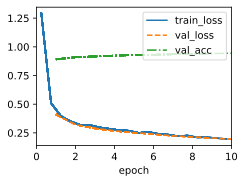

In [15]:
trainer_a = d2l.Trainer(max_epochs=10)
trainer_a.fit(model_a, data)

In [ ]:
#

In [20]:
print('Acurácia de validação para modelo A: ', evaluate_accuracy(model_a, data.val_dataloader()))


Acurácia de validação para modelo A:  0.9443


In [ ]:
#

In [21]:
@d2l.add_to_class(MLP)
def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.lr)

In [22]:
#

In [23]:
model_b = MLP(num_outputs=10, num_hiddens=128, lr=0.01)

In [24]:
#

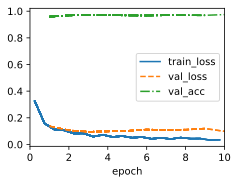

In [25]:
trainer_b = d2l.Trainer(max_epochs=10)
trainer_b.fit(model_b, data)

In [26]:
#

In [27]:
print('Acurácia de validação para modelo B: ', evaluate_accuracy(model_b, data.val_dataloader()))

Acurácia de validação para modelo B:  0.9744
